In [52]:
 # data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# data processing
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# unsupervised algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [53]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [54]:
file = 'crypto_data.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [56]:
#counts for whether coin trades or not
df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [57]:
#look for only coins that are trading and save
df_sub = df.loc[df.IsTrading].reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 54.9+ KB


In [58]:
#drop any coins that have null values.
df_sub = df_sub.dropna(how="any").reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 32.9+ KB


In [59]:
#filtered to coins that had total coins mined greater than 0
mask = df_sub.TotalCoinsMined > 0
df_sub = df_sub.loc[mask].reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 25.6+ KB


In [60]:

crypto_names = df_sub.CoinName

df_sub = df_sub.drop(["Unnamed: 0", 'CoinName', "IsTrading"], axis=1)
df_sub.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,X13,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,PoW,1.792718e+07,21000000
4,Ethash,PoW,1.076842e+08,0


In [62]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 16.8+ KB


In [10]:
#convert total coin supply to float
df_sub["TotalCoinSupply"] = df_sub.TotalCoinSupply.astype(float)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 16.8+ KB


In [11]:
#checking volume for algorithm
print(df_sub.Algorithm.nunique())
df_sub.Algorithm.value_counts()

71


Scrypt                    182
X11                        73
SHA-256                    48
CryptoNight                19
X13                        17
PoS                        17
Quark                      13
Equihash                   12
NeoScrypt                  10
NIST5                      10
Multiple                    9
Ethash                      9
DPoS                        7
XEVAN                       6
CryptoNight-V7              5
X16R                        4
Lyra2RE                     4
Groestl                     4
X15                         4
SHA-256D                    4
Lyra2REv2                   4
Lyra2Z                      4
Blake                       3
QuBit                       3
POS 3.0                     3
Dagger                      3
SHA-512                     3
CryptoNight Heavy           2
Skein                       2
Keccak                      2
C11                         2
PHI1612                     2
BLAKE256                    2
Blake2b   

In [12]:
#looking for those with low counts
algs = df_sub.Algorithm.value_counts()
algs_replace = list(algs[algs < 10].index)
algs_replace[0:10]

['Multiple',
 'Ethash',
 'DPoS',
 'XEVAN',
 'CryptoNight-V7',
 'X16R',
 'Lyra2RE',
 'Groestl',
 'X15',
 'SHA-256D']

In [13]:
# bundle if less than 10 to other
mask = df_sub.Algorithm.isin(algs_replace)
df_sub.loc[mask, "Algorithm"] = "Other"

df_sub.Algorithm.value_counts()

Scrypt         182
Other          131
X11             73
SHA-256         48
CryptoNight     19
X13             17
PoS             17
Quark           13
Equihash        12
NeoScrypt       10
NIST5           10
Name: Algorithm, dtype: int64

In [14]:
#check counts for prooftype
print(df_sub.ProofType.nunique())
df_sub.ProofType.value_counts()

25


PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
POBh                      1
LPoS                      1
Proof of Trust            1
Pos                       1
DPOS                      1
Zero-Knowledge Proof      1
HPoW                      1
PoA                       1
PoW + Hive                1
PoW/PoS                   1
PoW and PoS               1
Proof of Authority        1
TPoS                      1
PoW/PoW                   1
dPoW/PoW                  1
PoW/nPoS                  1
PoST                      1
PoS/PoW/PoT               1
PoS/LPoS                  1
Name: ProofType, dtype: int64

In [15]:
#fixing potential typos
df_sub.loc[df_sub.ProofType == 'Pos', "ProofType"] = "PoS"
df_sub.loc[df_sub.ProofType == 'PoW and PoS', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoS/PoW', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoW/PoS ', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoW/PoW ', "ProofType"] = "PoW"

In [16]:
#bundling those under 50 counts into other  
pts = df_sub.ProofType.value_counts()
pts_replace = list(pts[pts < 50].index)
pts_replace[0:10]

['DPoS',
 'PoC',
 'PoW + Hive',
 'LPoS',
 'Proof of Trust',
 'DPOS',
 'Zero-Knowledge Proof',
 'HPoW',
 'PoA',
 'TPoS']

In [17]:
mask = df_sub.ProofType.isin(pts_replace)
df_sub.loc[mask, "ProofType"] = "Other"

df_sub.ProofType.value_counts()

PoW        237
PoW/PoS    180
PoS         87
Other       28
Name: ProofType, dtype: int64

In [18]:
#labeling values 
oh_cols = ["Algorithm", "ProofType"]
df_oh = df_sub.loc[:, oh_cols]

df_oh = pd.get_dummies(df_oh)
df_oh.head()

,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [19]:
#scaling numerical columns
num_cols = ["TotalCoinsMined", "TotalCoinSupply"]
df_num = df_sub.loc[:, num_cols]

scaler = StandardScaler()
scaler.fit(df_num)

df_num = pd.DataFrame(scaler.transform(df_num), columns=num_cols)
df_num.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870


In [20]:
df_train = pd.concat([df_num, df_oh], axis=1)
df_train.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,-0.093970,-0.145009,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.524946,4.489424,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,-0.116715,-0.152560,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,-0.114747,-0.152870,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [21]:
 # TSNE
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_train)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

(532, 2)


,Feature1,Feature2
0,-20.977303,-3.463734
1,-26.038897,0.918876
2,-0.414014,10.426276
3,8.009327,5.395653
4,19.255877,2.025513


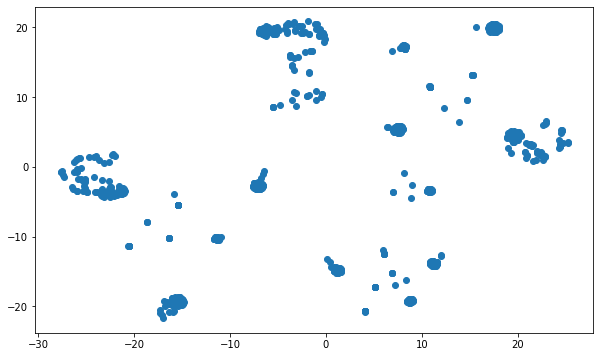

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.show()

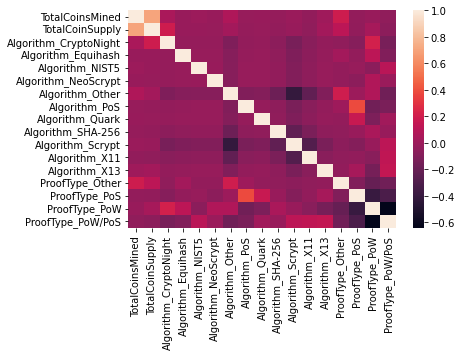

In [23]:
corrs = df_train.corr()
sns.heatmap(corrs)
plt.show()

In [24]:
corrs

,TotalCoinsMined,TotalCoinSupply,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
TotalCoinsMined,1.000000,0.702301,0.046358,-0.015083,-0.004300,-0.014830,0.064477,-0.020827,-0.018368,-0.025781,-0.009377,-0.042141,0.007338,0.190232,-0.033243,-0.017466,-0.045446
TotalCoinSupply,0.702301,1.000000,0.191816,-0.017729,-0.014702,-0.020049,0.025065,-0.027379,-0.023895,-0.034459,-0.015754,-0.049680,0.022187,0.116940,-0.039411,0.033228,-0.059287
Algorithm_CryptoNight,0.046358,0.191816,1.000000,-0.029235,-0.026637,-0.026637,-0.109997,-0.034965,-0.030458,-0.060606,-0.138778,-0.076749,-0.034965,-0.045361,-0.085094,0.214711,-0.137620
Algorithm_Equihash,-0.015083,-0.017729,-0.029235,1.000000,-0.021026,-0.021026,-0.086827,-0.027600,-0.024042,-0.047840,-0.109545,-0.060582,-0.027600,0.020887,-0.032941,0.118542,-0.108631
Algorithm_NIST5,-0.004300,-0.014702,-0.026637,-0.021026,1.000000,-0.019157,-0.079109,-0.025147,-0.021905,-0.043588,-0.099808,-0.055198,-0.025147,-0.032623,-0.023776,-0.068363,0.105794
Algorithm_NeoScrypt,-0.014830,-0.020049,-0.026637,-0.021026,-0.019157,1.000000,-0.079109,-0.025147,-0.021905,-0.043588,-0.099808,-0.055198,-0.025147,-0.032623,-0.061199,0.070876,-0.011217
Algorithm_Other,0.064477,0.025065,-0.109997,-0.086827,-0.079109,-0.079109,1.000000,-0.103845,-0.090459,-0.179995,-0.412159,-0.227939,-0.103845,0.197450,-0.004989,0.075855,-0.168966
Algorithm_PoS,-0.020827,-0.027379,-0.034965,-0.027600,-0.025147,-0.025147,-0.103845,1.000000,-0.028755,-0.057216,-0.131015,-0.072456,-0.033010,0.005038,0.382008,-0.162849,-0.129923
Algorithm_Quark,-0.018368,-0.023895,-0.030458,-0.024042,-0.021905,-0.021905,-0.090459,-0.028755,1.000000,-0.049841,-0.114127,-0.063117,-0.028755,-0.037304,0.160438,-0.117362,0.015477
Algorithm_SHA-256,-0.025781,-0.034459,-0.060606,-0.047840,-0.043588,-0.043588,-0.179995,-0.057216,-0.049841,1.000000,-0.227091,-0.125589,-0.057216,-0.044845,-0.015071,0.047739,-0.017203


[0.495, 0.118, 0.089, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015, 0.009, 0.008, 0.008, 0.006, 0.006, 0.005, 0.0, 0.0]


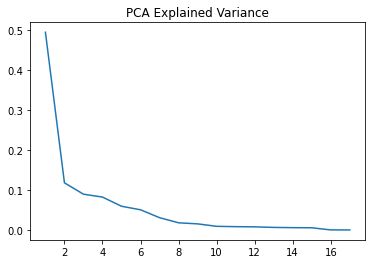

In [25]:
# Initialize PCA model
pca = PCA(n_components=len(df_train.columns))
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])
plt.plot(range(1,len(df_train.columns)+1), pca.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

In [29]:
pca = PCA(n_components=0.99)
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])

[0.495, 0.118, 0.089, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015, 0.009, 0.008, 0.008, 0.006, 0.006]


In [30]:
df_pca = pd.DataFrame(pca.transform(df_train))
df_pca.columns = [f"Feature {x}" for x in range(1, len(pca.explained_variance_ratio_)+1)]
df_pca.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14
0,-0.217131,-0.896267,0.378638,-0.370731,-0.087521,-0.288928,-0.000649,-0.027602,-0.027241,-0.053224,0.013468,-0.011570,0.019863,-0.022797
1,-0.195243,-0.898326,0.370452,-0.377274,-0.088020,-0.287457,-0.000382,-0.028807,-0.027389,-0.053424,0.013386,-0.011628,0.019930,-0.022855
2,3.523125,-0.476285,2.171310,1.972656,-0.198131,-0.111387,0.210601,-0.188368,0.323573,0.827363,-0.138865,-0.204003,-0.100646,-0.063712
3,-0.185170,0.651278,-0.010801,-0.094727,-0.198288,0.454131,0.829598,0.195923,-0.272624,0.029465,0.002014,-0.024169,-0.037363,-0.017090
4,-0.156799,0.846609,-0.364278,0.197044,-0.274519,-0.430230,-0.083059,-0.115133,-0.092318,0.025767,0.027577,-0.011910,-0.031834,-0.018015


In [31]:
# TSNE
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_pca)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

(532, 2)


,Feature1,Feature2
0,-23.904505,-9.105062
1,-31.115179,-6.904202
2,10.196150,10.187701
3,-3.646305,-9.036114
4,-8.644919,14.394348


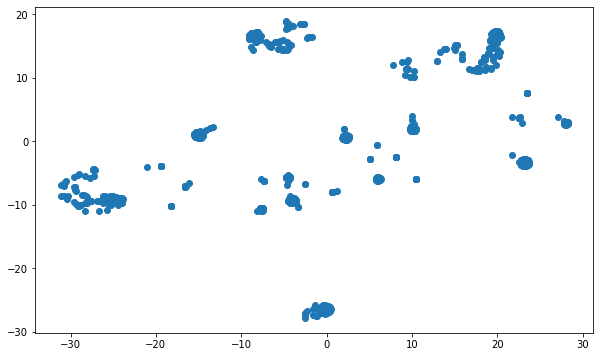

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.show()

C:\Users\yvargas\Downloads\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


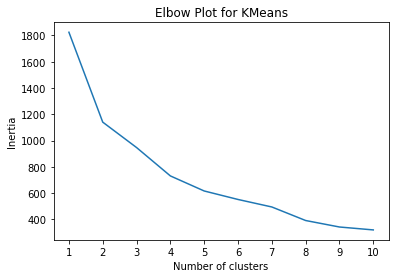

In [46]:
# KMEANS

inertia = []
k = list(range(1, 11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Plot for KMeans")
plt.show()

In [34]:
def getSilhouette(X, range_n_clusters, model = "kmeans"):
    for n_clusters in range_n_clusters:

        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        if model == "kmeans":
            clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        else:
            clusterer = AgglomerativeClustering(n_clusters=n_clusters,
                                 affinity='euclidean',
                                 linkage='ward')
            
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        plt.suptitle(
            f"Silhouette analysis for {model} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9115145483602423
For n_clusters = 3 The average silhouette_score is : 0.2687960077111592
For n_clusters = 4 The average silhouette_score is : 0.2701299179640316
For n_clusters = 5 The average silhouette_score is : 0.3353272673009128
For n_clusters = 6 The average silhouette_score is : 0.3065524565933426
For n_clusters = 7 The average silhouette_score is : 0.3626985785896324
For n_clusters = 8 The average silhouette_score is : 0.39810818993136843
For n_clusters = 9 The average silhouette_score is : 0.47211451280738476
For n_clusters = 10 The average silhouette_score is : 0.4873354670235455


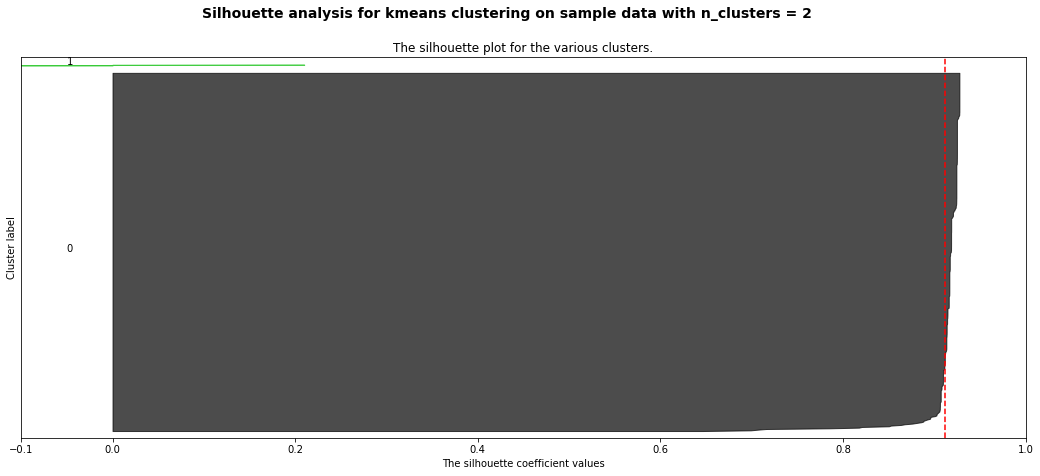

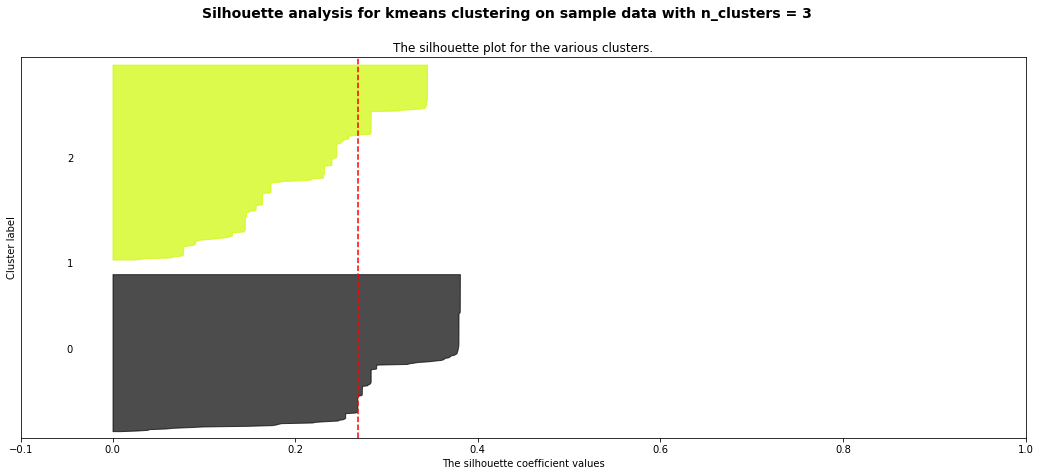

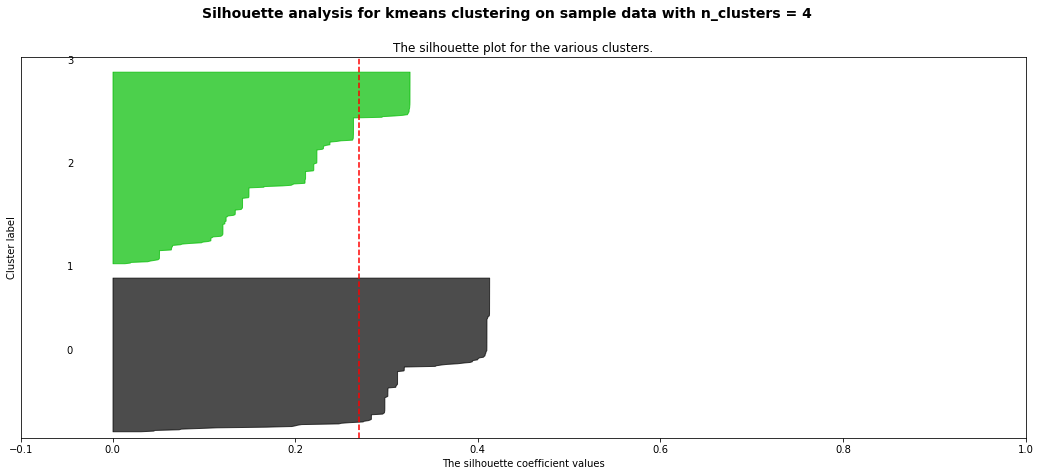

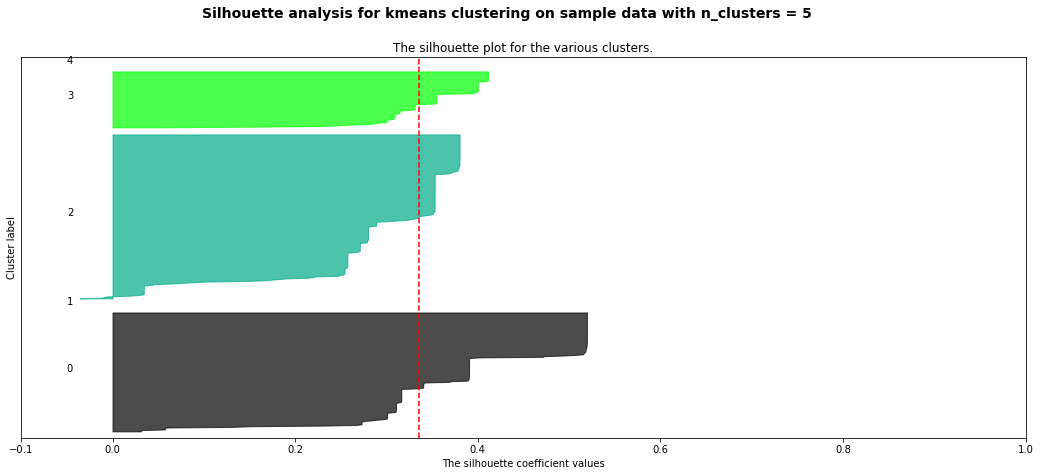

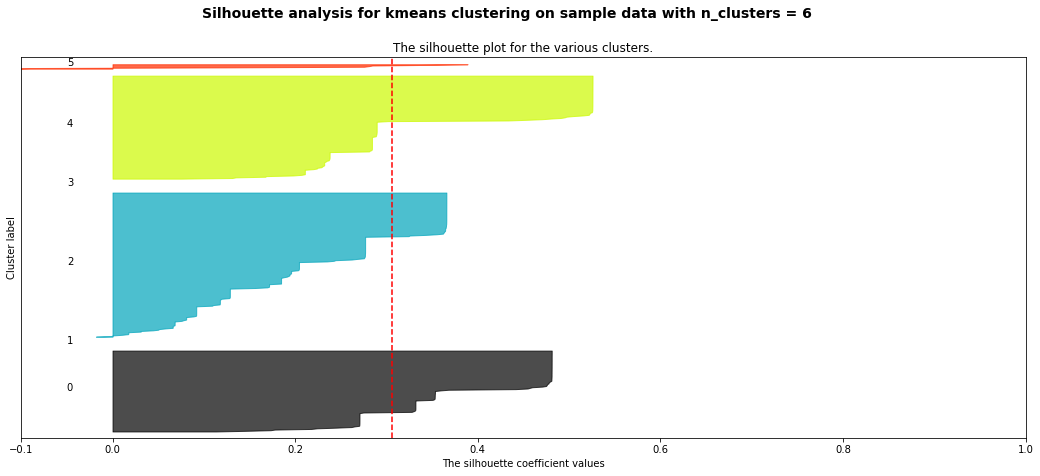

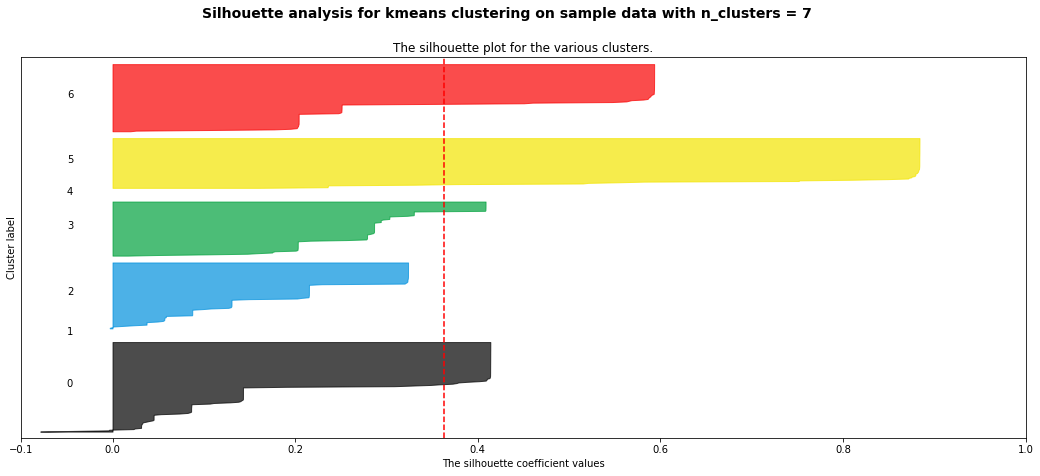

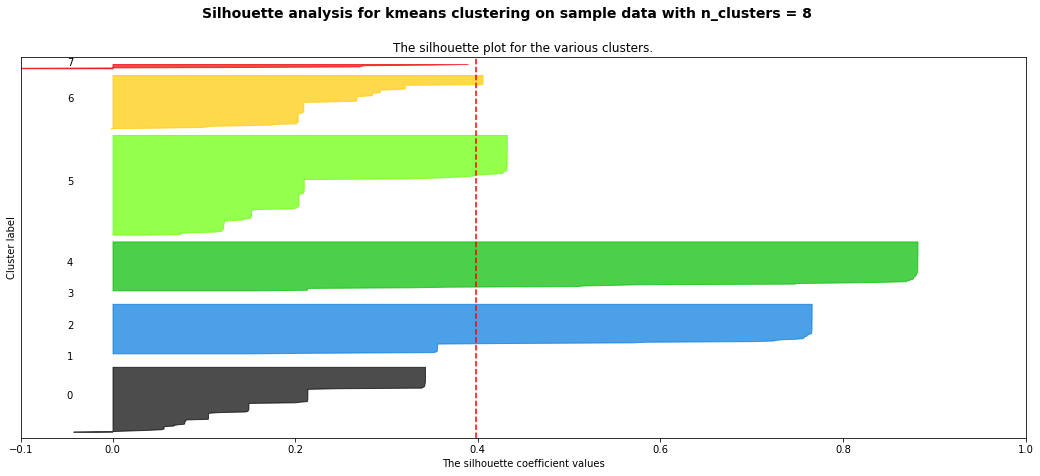

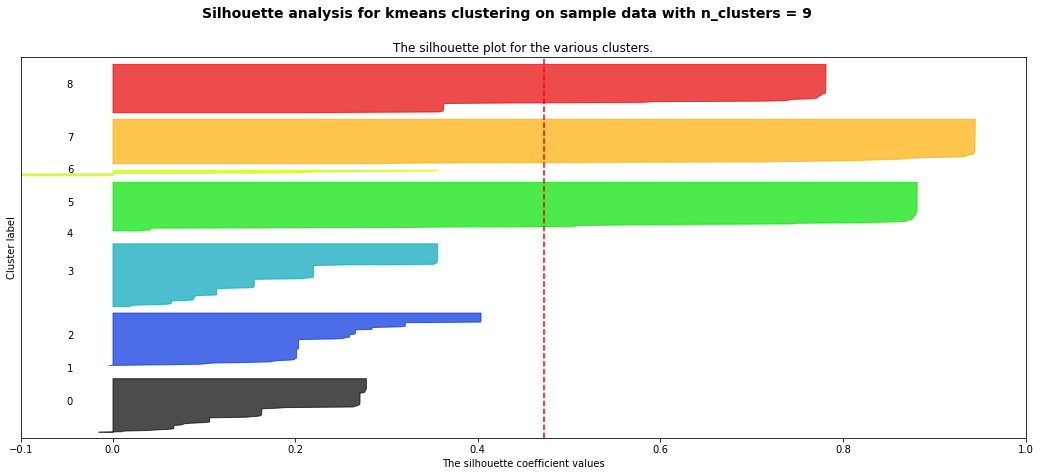

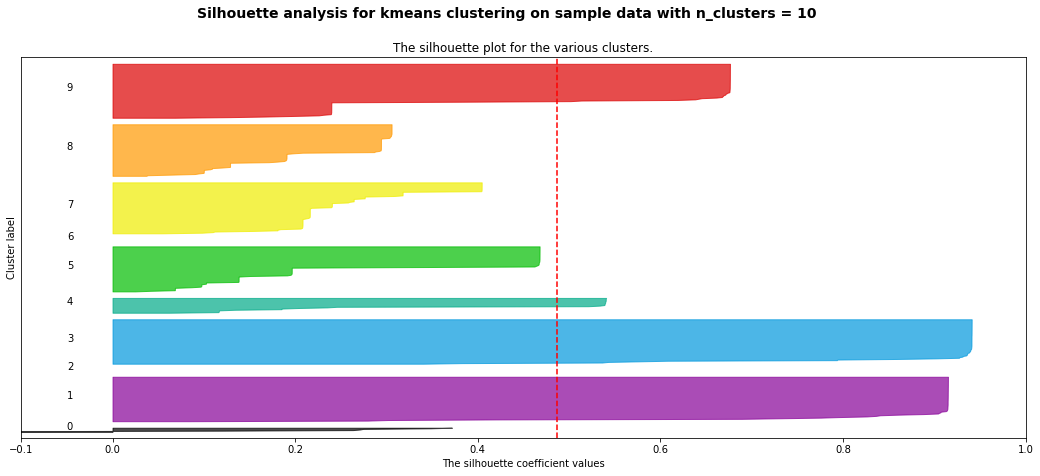

In [48]:
 # Silhouette score
X = df_pca.values
range_n_clusters  = list(range(2,11))

getSilhouette(X, range_n_clusters, "kmeans")

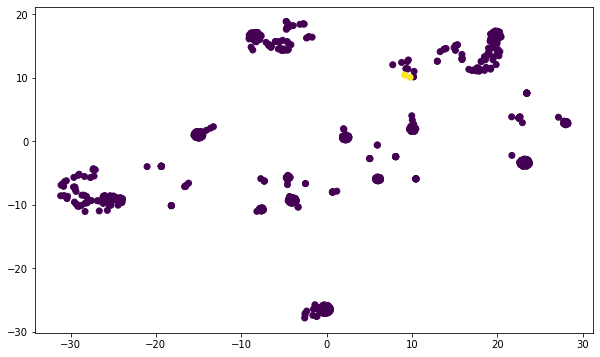

In [37]:
# Initializing model with K =2
k = 2
model = KMeans(n_clusters=k, random_state=42)

# Fitting model
model.fit(df_pca)

# predictions
k_labels = model.predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"], c=k_labels)
plt.show()

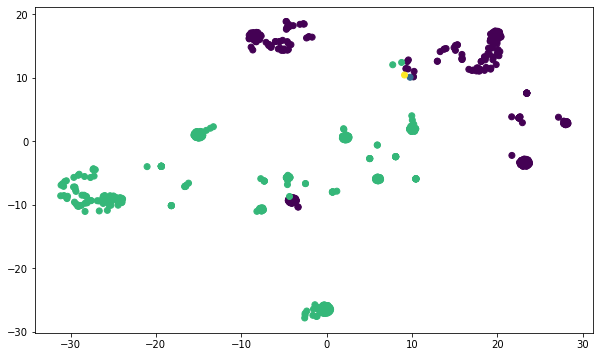

In [49]:
# Initializing model with K =4
k = 4
model = KMeans(n_clusters=k, random_state=42)

# Fitting model
model.fit(df_pca)

# predictions
k_labels = model.predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"], c=k_labels)
plt.show()

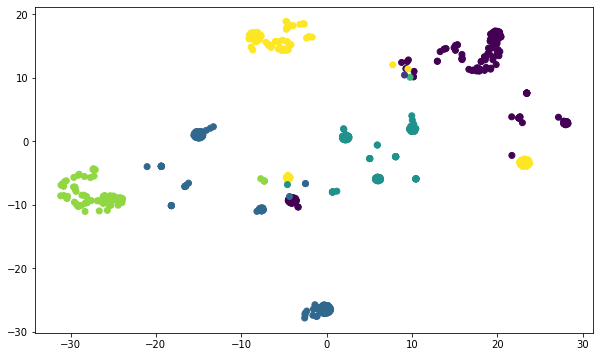

In [51]:
# Initializing model with K =7
k = 7
model = KMeans(n_clusters=k, random_state=42)

# Fitting model
model.fit(df_pca)

# predictions
k_labels = model.predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"], c=k_labels)
plt.show()

I do not think cryptocurrentcies can be clustered together. When looking at the kmeans elbow to see how many potential clusteres there could be based on the inertia, we see that the elbow does not level out at any point, and kind of just slopes downward. I can also see the inability to cluster when coloring the tsne plot based on the number of potential clusters (2,4,7). The average silhouette_scores are also very low. 